# Telecom Churn Analysis

## Importing the data

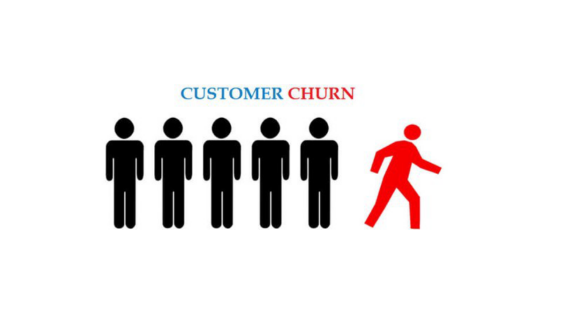

In [1]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
from scipy.stats import ttest_ind
from scipy.stats import pointbiserialr
import seaborn as sns
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
from PIL import  Image


%matplotlib inline
plt.figure(figsize=(10,10))
img = np.array(Image.open(r"D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\Telecom Churn Analysis\churn.jpg"))
plt.imshow(img,interpolation="bilinear")
plt.axis("off")
plt.show()

In [187]:
from scipy.stats import chi2_contingency

def categorical_association(df, c1, c2):  
    #barchart
    sns.catplot(x=c2, col=c1, data=df, saturation=.5,kind="count",height=3, aspect=1)
    plt.show()
    #creating crosstabs to generate chi-square statistic
    data=pd.crosstab(df[c1],df[c2])
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    s, p, d, t=chi2_contingency(data.fillna(0))
    #caluclating cramerV to measure the strength of association between the variables
    chi2 = chi2_contingency(data.fillna(0))[0]
    n = data.values.sum()
    cramers_v=np.sqrt(chi2 / (n*(min(data.shape)-1)))
    
    if (p<0.05):
        print(color.BOLD+color.GREEN + 'There is association between '+str(c1) +' and  ' +str(c2))
        print('The strength of the assocation is '+str(round(cramers_v,2)))
    else:
        print(color.BOLD+color.RED +'There is no association between '+str(c1) +' and  ' +str(c2))
    print(' ')
    print(color.END+' ')
    return c1,round(cramers_v,2),round(p,4)
    
def continous_association(df,c1,c2):
    sns.boxplot(x=c1,y=c2,data=df)
    plt.title('Comparison of Average tenure between churned and not churned customers')
    plt.show()
    churn_sample=churn_data[churn_data[c1]=='Yes'][c2]
    nonchurn_sample=churn_data[churn_data[c1]=='No'][c2]
    t,p=ttest_ind(churn_sample,nonchurn_sample)
    continuous_data=churn_data[c2]
    binary_data=pd.DataFrame(churn_data[c1])
    binary_data.replace({'Churn':{'No':0,'Yes':1}},inplace=True)
    #biserialcorrelation
    pbc = pointbiserialr(continuous_data, binary_data[c1])[0]
    if (p<0.05):
        print(color.BOLD+color.GREEN + 'There is association between '+str(c1) +' and  ' +str(c2))
    else:
        print(color.BOLD+color.RED +'There is no association between '+str(c1) +' and  ' +str(c2))
    print('The strength of relation is '+str(round(pbc,2)))

def dummy_variables_creation(df):
    
    #categorical columns list
    categorical_columns_list=df.select_dtypes(include=['object','category']).columns.to_list()
    #creating a backup
    final=df.copy()
    for i in categorical_columns_list:
        variable_name=str(i)+'_dummy'
        variable_name=pd.get_dummies(df[i], prefix=i)
        final=pd.concat([final,variable_name],axis=1)
    total_columns_list=final.columns.values.tolist()
    To_drop_variables=[i for i in total_columns_list if i  in categorical_columns_list]
    print(color.BOLD+color.RED+'The variables that are dropped as part of dummy creation')
    print(To_drop_variables)
    To_keep_variables=[i for i in total_columns_list if i not in categorical_columns_list]
    final=final[To_keep_variables]
    return(final)


In [148]:
#importing the data
os.chdir('D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\Telecom Churn Analysis')
churn_data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step 2: Pre-processing the data


* Handling the missing values,Dropping the unnecessary columns
* Type Casting
* Exploratory Data Analysis 
* Transforming the skewed variables
* Dummy coding the categorical variables
* Splitting the data

### a. Looking at the missing values in the data set

In [149]:
print(color.BOLD+color.RED+'There are no missing values in the dataset ')
print('')
print(churn_data.isnull().sum().sort_values(ascending=False))

There are no missing values in the dataset 

Churn               0
OnlineSecurity      0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineBackup        0
TotalCharges        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
customerID          0
dtype: int64


### b. Type Casting

In [150]:
print(churn_data.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [151]:
#Replacing the values in the columns
churn_data.replace({'SeniorCitizen':{0:'No',1:'Yes'},
                    'MultipleLines':{'No phone service':'No'},
                    'OnlineSecurity':{'No internet service':'No'},
                    'OnlineBackup'  :{'No internet service':'No'},
                    'DeviceProtection':{'No internet service':'No'},
                    'TechSupport':{'No internet service':'No'},
                   'StreamingTV':{'No internet service':'No'},
                   'StreamingMovies':{'No internet service':'No'}},
                   inplace=True)

#replacing the blank values with null values
churn_data['TotalCharges'].replace(r'^\s*$','NaN', regex=True,inplace=True)

In [152]:
#There are 12(<1%) records in the data with TotalCharges as NaN
# we can either replace them / drop 
churn_data=churn_data[churn_data['TotalCharges']!='NaN']

#typecasting the Total Charges column to float
churn_data['TotalCharges']=churn_data['TotalCharges'].astype(float)

In [153]:
#dropping customerID columns
churn_data.drop(columns=['customerID'],inplace=True)

In [154]:
#splitting the columns into numerical and categorical columns

numeric_cols_data=churn_data.select_dtypes(include=['int64','float64'])
print(color.RED+color.BOLD+'The quantitative variables are')
print(numeric_cols_data.columns)

print('')
print('#####################################################')
print('')

categorical_cols_data=churn_data.select_dtypes(include=['object'])
print(color.GREEN +color.BOLD+ 'The qualitative variables are')
print(categorical_cols_data.columns)


The quantitative variables are
Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

#####################################################

The qualitative variables are
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], dtype='object')


# Exploratory Data Analysis

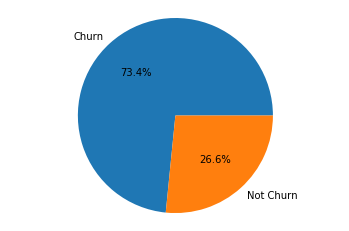

This is a class imbalance problem , which will be later handled using sampling techiques


In [155]:
# Looking at the values of Yes and No's in the target variable CHURN
labels = ['Churn','Not Churn']
sizes = [churn_data['Churn'].value_counts()[0],churn_data['Churn'].value_counts()[1]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()
plt.show()
print(color.BOLD+'This is a class imbalance problem , which will be later handled using sampling techiques')

### Categorical Variables

    Checking the  associations between the target and the categorical predictors

#### Chi-Square test of Independence

https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/chi-square/

A chi-square test for independence compares two variables in a contingency table to see if they are related. In a more general sense, it tests to see whether distributions of categorical variables differ from each another.
A very small chi square test statistic means that your observed data fits your expected data extremely well. In other words, there is a relationship.
A very large chi square test statistic means that the data does not fit very well. In other words, there isn’t a relationship.

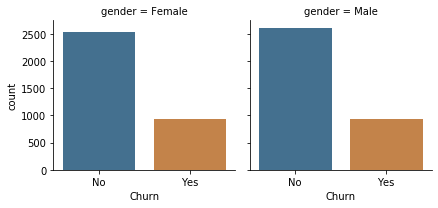

There is no association between gender and  Churn
 
 


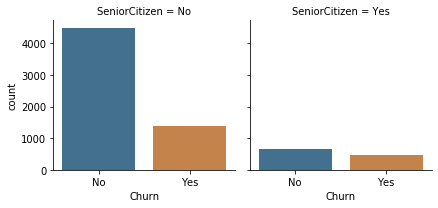

There is association between SeniorCitizen and  Churn
The strength of the assocation is 0.15
 
 


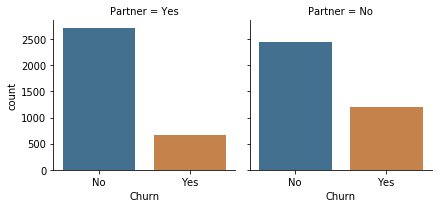

There is association between Partner and  Churn
The strength of the assocation is 0.15
 
 


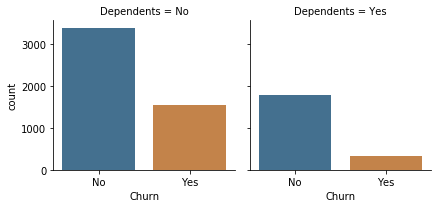

There is association between Dependents and  Churn
The strength of the assocation is 0.16
 
 


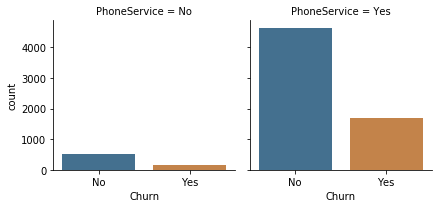

There is no association between PhoneService and  Churn
 
 


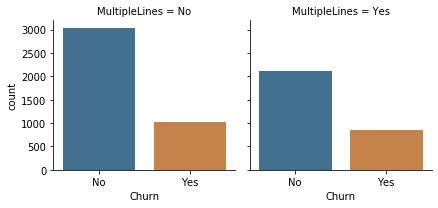

There is association between MultipleLines and  Churn
The strength of the assocation is 0.04
 
 


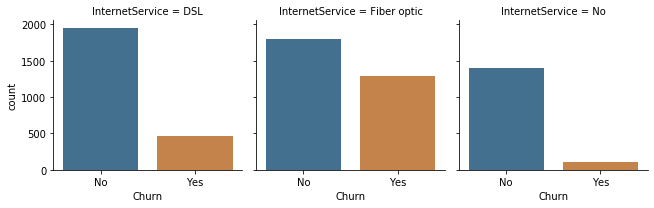

There is association between InternetService and  Churn
The strength of the assocation is 0.32
 
 


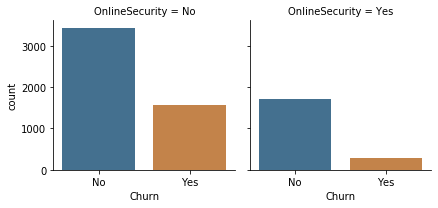

There is association between OnlineSecurity and  Churn
The strength of the assocation is 0.17
 
 


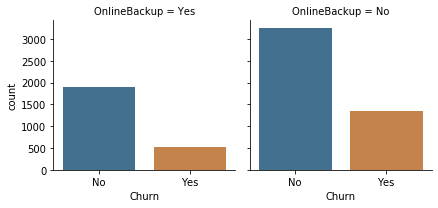

There is association between OnlineBackup and  Churn
The strength of the assocation is 0.08
 
 


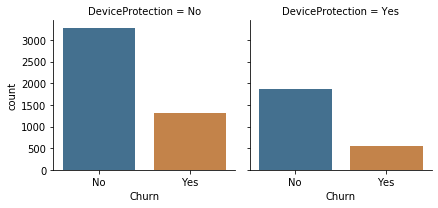

There is association between DeviceProtection and  Churn
The strength of the assocation is 0.07
 
 


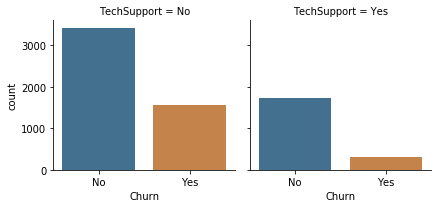

There is association between TechSupport and  Churn
The strength of the assocation is 0.16
 
 


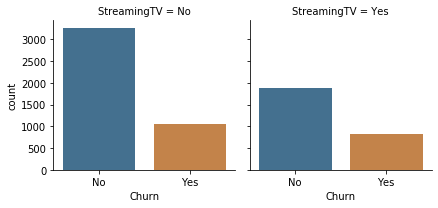

There is association between StreamingTV and  Churn
The strength of the assocation is 0.06
 
 


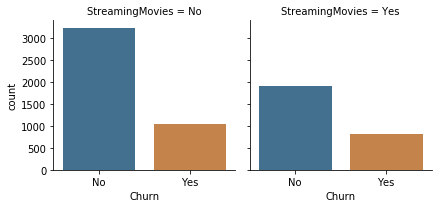

There is association between StreamingMovies and  Churn
The strength of the assocation is 0.06
 
 


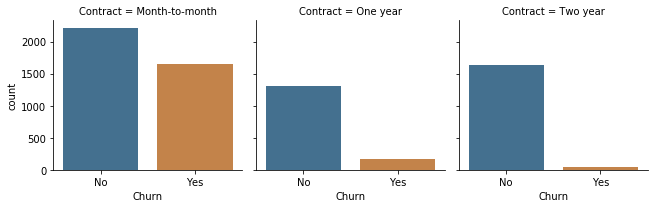

There is association between Contract and  Churn
The strength of the assocation is 0.41
 
 


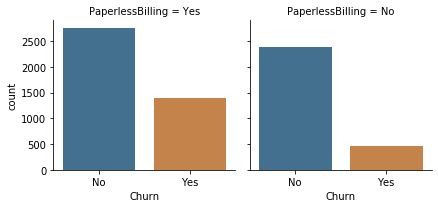

There is association between PaperlessBilling and  Churn
The strength of the assocation is 0.19
 
 


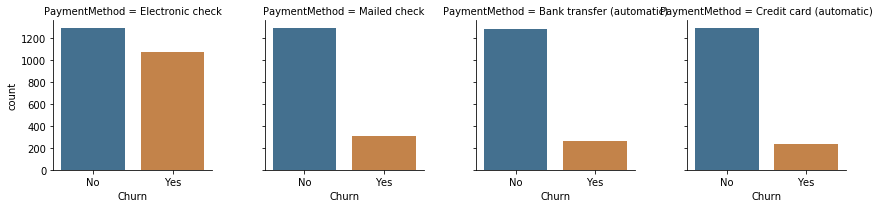

There is association between PaymentMethod and  Churn
The strength of the assocation is 0.3
 
 


In [156]:
cramers_v_df=[]
columns_list=churn_data.select_dtypes(include=['object']).columns.to_list()
for i in columns_list:
    if(i != 'Churn'):
        col,cramerv,p=categorical_association(churn_data,str(i),'Churn')
        cramers_v_df.append([col,round(cramerv,2),p])

### Highlights from exploratory data analysis for the categorical variables

    * From the Chi-square test of independence, we can say except for the gender and phone 
      service, other categorical variables are associated with the Target variable Churn
      
    * The Cramer's V coefficient has been used to measure the association between the nominal 
      variables and the categorical target variables
      
       * Out of all the variables, contract type has the strongest association with coefficient
         of 0.41. If a customer is on month-to-month, the chances of his churn are pretty high
           
       * The next variable is InternetService with coefficient of 0.32,followed by Payment method.
             
          - If the internet service is Fiber Optic, the chances of their churn is High
             
          - If the payment method is electronic payment, the chances of them churning out 
            is high when compared to the customers making payment through other modes ofpayment

In [161]:
print('The CramerV correlation coefficient for the nominal variables are')
pd.DataFrame(cramers_v_df,columns=['variable','cramerV','p-value']).sort_values(by=['cramerV'],ascending=False)

The CramerV correlation coefficient for the nominal variables are


,variable,cramerV,p-value
13,Contract,0.41,0.0000
6,InternetService,0.32,0.0000
15,PaymentMethod,0.30,0.0000
14,PaperlessBilling,0.19,0.0000
7,OnlineSecurity,0.17,0.0000
3,Dependents,0.16,0.0000
10,TechSupport,0.16,0.0000
1,SeniorCitizen,0.15,0.0000
2,Partner,0.15,0.0000
8,OnlineBackup,0.08,0.0000


### Variables to drop after preliminary EDA

    * Insiginifcant variables
    * Variables with very low cramer's V correlation(<0.10) with the target 

In [162]:
churn_data.drop(columns=['gender','PhoneService','MultipleLines','StreamingMovies','StreamingTV','DeviceProtection',
                        'OnlineBackup'],inplace=True)

### Numeric Variables

* Checking the  associations among the numerical predictors

    * Correlation Analysis


* Checking the  associations between the target and the numerical predictors

    * Point-Biserial Correlation

        * The Point-Biserial Correlation Coefficient is a correlation measure of the strength of
          association between a continuous-level variable (ratio or interval data) and a binary 
          variable. Binary variables are variables of nominal scale with only two values.

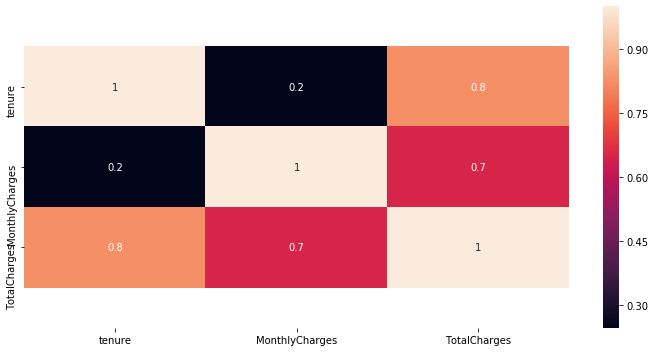

In [157]:
plt.figure(figsize = (10,5))
ax=sns.heatmap(numeric_cols_data.corr(), annot=True,fmt='.1g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top -1)
plt.tight_layout()

### Insights from Correlation Analysis

    * Total Charges and Monthly charges have a correlation of 0.7
    * Total Charges and Tenure have a correlation of 0.8
        Reason : Total Charges = (Monthly Charges * Tenure) + Additional Charges

####  Association between the Continuous Variable and Target 

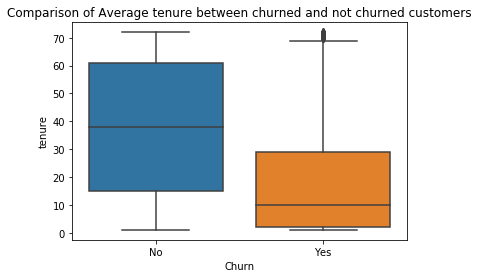

There is association between Churn and  tenure
The strength of relation is -0.35


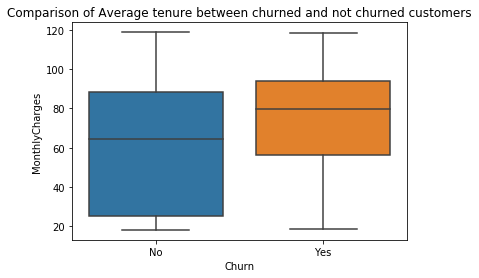

There is association between Churn and  MonthlyCharges
The strength of relation is 0.19


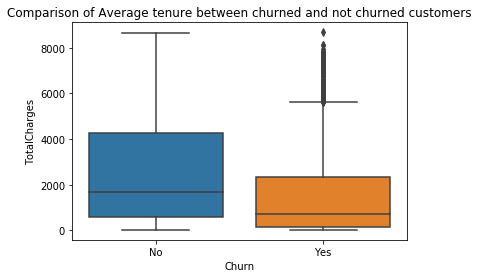

There is association between Churn and  TotalCharges
The strength of relation is -0.2


In [158]:
#Checkicg for the association for continous variables
continous_association(churn_data,'Churn','tenure')
continous_association(churn_data,'Churn','MonthlyCharges')
continous_association(churn_data,'Churn','TotalCharges')

### Insights from the correlation analysis and statistical tests

    * All three variables are highly correlated with each other
    * The strength of association between tenure and the target is the largest.
    
       I'm considering only tenure out of the three variables

In [164]:
churn_data.drop(columns=['TotalCharges','MonthlyCharges'],inplace=True)

In [165]:
print(color.BOLD+'The Descriptive statistics of tenure is ')
churn_data['tenure'].describe()

The Descriptive statistics of tenure is 


count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [166]:
#converting the column tenure from months into years
churn_data['tenure_bin']=pd.cut(churn_data['tenure'], [0, 12,24,36,48,60,72],
       labels=['0_12', '12_24', '24_36','36_48','48_60','60_72'])
churn_data['tenure_bin'].astype('object')

#dropping tenure column
churn_data.drop(columns=['tenure'],inplace=True)

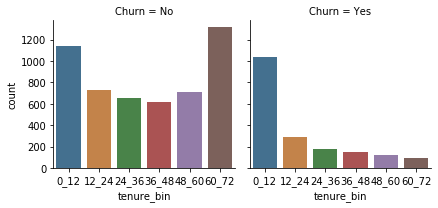

There is association between Churn and  tenure_bin
The strength of the assocation is 0.35
 
 


('Churn', 0.35, 0.0)

In [167]:
categorical_association(churn_data,'Churn','tenure_bin')

### 4. Variable Transformations

In [211]:
print(color.BOLD+color.GREEN+'The skewness of the variables are ')
print('')
skewness=churn_data.skew(axis = 0, skipna = True,numeric_only=True).sort_values(ascending=False) 
print(skewness)

The skewness of the variables are 

Series([], dtype: float64)


### 5. Dummy Variables Creation

In [188]:
Churn_predictors_cat=dummy_variables_creation(churn_data)
Churn_predictors_cat.drop(columns=['Churn_Yes','Churn_No'],inplace=True)

The variables that are dropped as part of dummy creation
['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'tenure_bin']


In [212]:
#separating target variable from the predictors 
churn_target=churn_data.replace({'Churn':{'No':0,'Yes':1}})['Churn']
churn_target=churn_target.astype('int')

## SMOTE Sampling 

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [213]:
# transform the dataset
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
Churn_predictors_os, Churn_Target_os = oversample.fit_resample(Churn_predictors_cat,churn_target)

### Splitting the dataset into training and test 

In [214]:
# create training and testing data set (70-30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Churn_predictors_os, Churn_Target_os, test_size=0.3,random_state=12345)

### Building a Logistic Regression model

In [314]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#Recursive feature elimination to further eliminate any redundant varibles
rfe = RFE(logreg,)
rfe.fit(X_train, y_train)

#Extracting the most important features

important_variables = rfe.get_support(1)
print(color.BOLD+'The variables selected are ')
print(' ')
print(X_train_selected.columns.tolist())

C:\Users\Harish Patlolla\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The variables selected are 
 
['Dependents_No', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'Contract_Month-to-month', 'Contract_One year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_bin_0_12']


### Subsetting the data containing only the important features

In [386]:
X_train_selected= X_train[X_train.columns[important_variables]]
X_test_selected= X_test[X_test.columns[important_variables]]

### Fitting the logistic Regression model in statmodels using the important features

In [387]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

X_train_selected=X = sm.add_constant(X_train_selected)
logit_model=sm.Logit(y_train,X_train_selected)
logistic_fit=logit_model.fit()
print(logistic_fit.summary2())

         Current function value: 0.420320
         Iterations: 35
                                         Results: Logit
Model:                         Logit                       Pseudo R-squared:            0.394    
Dependent Variable:            Churn                       AIC:                         6106.1423
Date:                          2020-04-01 14:55            BIC:                         6209.4281
No. Observations:              7228                        Log-Likelihood:              -3038.1  
Df Model:                      14                          LL-Null:                     -5010.1  
Df Residuals:                  7213                        LLR p-value:                 0.0000   
Converged:                     0.0000                      Scale:                       1.0000   
No. Iterations:                35.0000                                                           
----------------------------------------------------------------------------------------------

C:\Users\Harish Patlolla\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

C:\Users\Harish Patlolla\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

C:\Users\Harish Patlolla\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

C:\Users\Harish Patlolla\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

C:\Users\Harish Patlolla\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

C:\Users\Harish Patlolla\Anaconda3\lib\s

In [388]:
oddsratio=pd.DataFrame(np.exp(logistic_fit.params)).reset_index().rename(columns={'index':'variable',
                                                                  0:'oddsratio'})

print(oddsratio.sort_values(by=['oddsratio'],ascending=False))

                                   variable     oddsratio
12           PaymentMethod_Electronic check  7.075730e+08
13               PaymentMethod_Mailed check  4.609583e+08
10  PaymentMethod_Bank transfer (automatic)  3.770308e+08
11    PaymentMethod_Credit card (automatic)  3.136869e+08
4                         OnlineSecurity_No  1.939633e+06
5                        OnlineSecurity_Yes  9.067123e+05
9                      PaperlessBilling_Yes  1.496292e+02
8                       PaperlessBilling_No  8.437270e+01
6                   Contract_Month-to-month  7.803643e+00
3               InternetService_Fiber optic  6.108082e+00
14                          tenure_bin_0_12  3.011098e+00
2                       InternetService_DSL  2.317727e+00
7                         Contract_One year  2.311495e+00
1                             Dependents_No  1.354288e+00
0                                     const  2.351617e-19


### Insights from the odds ratio table

        * if the customer tenure with the company is less than 12 months, the odds of the customer 
          churn increases by 1.65
        
        * if the customer payment method is Electronic Check, the odds of the customer 
          churn increases by 1.47 
        
        

### Testing the logistic regression model on the train and test data

In [441]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer

def accuracy_metrics(predict,actual):
    
    
    #confusion matrix
    conf_matrix_train = confusion_matrix(predict.round(),actual)
    fig, ax = plt.subplots(figsize=(5,4))
    heatmap=sns.heatmap(conf_matrix_train,annot=True,fmt="d",
                    xticklabels=['Non Churn', 'Churn'],yticklabels=['Non Churn', 'Churn'])
    ax.set_ylim([0,2])
    plt.ylabel('Actual ')
    plt.xlabel('Predicted ')
    plt.show()

    #F-1score, accuracy, precision,recall
    print('Classification Report is \n')
    print(classification_report(predict.round(),actual))

    #Area under the curve (AUC)
    model_roc_auc = roc_auc_score(predict.round(),actual) 
    print ("Area under curve : ",round(model_roc_auc,3),"\n")

C:\Users\Harish Patlolla\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



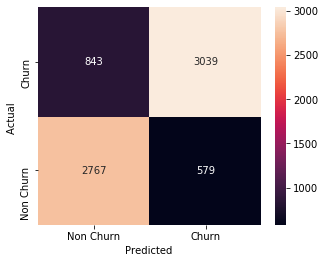

Classification Report is 

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80      3346
         1.0       0.84      0.78      0.81      3882

    accuracy                           0.80      7228
   macro avg       0.80      0.80      0.80      7228
weighted avg       0.81      0.80      0.80      7228

Area under curve :  0.805 

##################################################
 Test data accuracy metrics are 


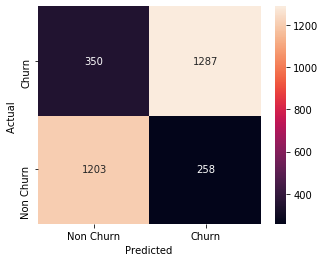

Classification Report is 

              precision    recall  f1-score   support

         0.0       0.77      0.82      0.80      1461
         1.0       0.83      0.79      0.81      1637

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.81      0.80      0.80      3098

Area under curve :  0.805 



In [442]:
#fitting logistic model on the train dataset
y_pred_train=logistic_fit.predict(X_train_selected)

#fitting logistic model on the test dataset
X_test_selected=X = sm.add_constant(X_test_selected)
y_pred_test=logistic_fit.predict(X_test_selected)

#training dataset
accuracy_metrics(y_pred_train,y_train)

#testing dataset
print('##################################################')
print(' Test data accuracy metrics are ')
accuracy_metrics(y_pred_test,y_test)

# <font color="darkpink">Decision Trees

In [443]:
from sklearn.tree import DecisionTreeClassifier
#creating an instance for a decision tree classifier
dec_tree = DecisionTreeClassifier(criterion='gini',max_depth=5)

#Fitting a decision tree on the training dataset
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

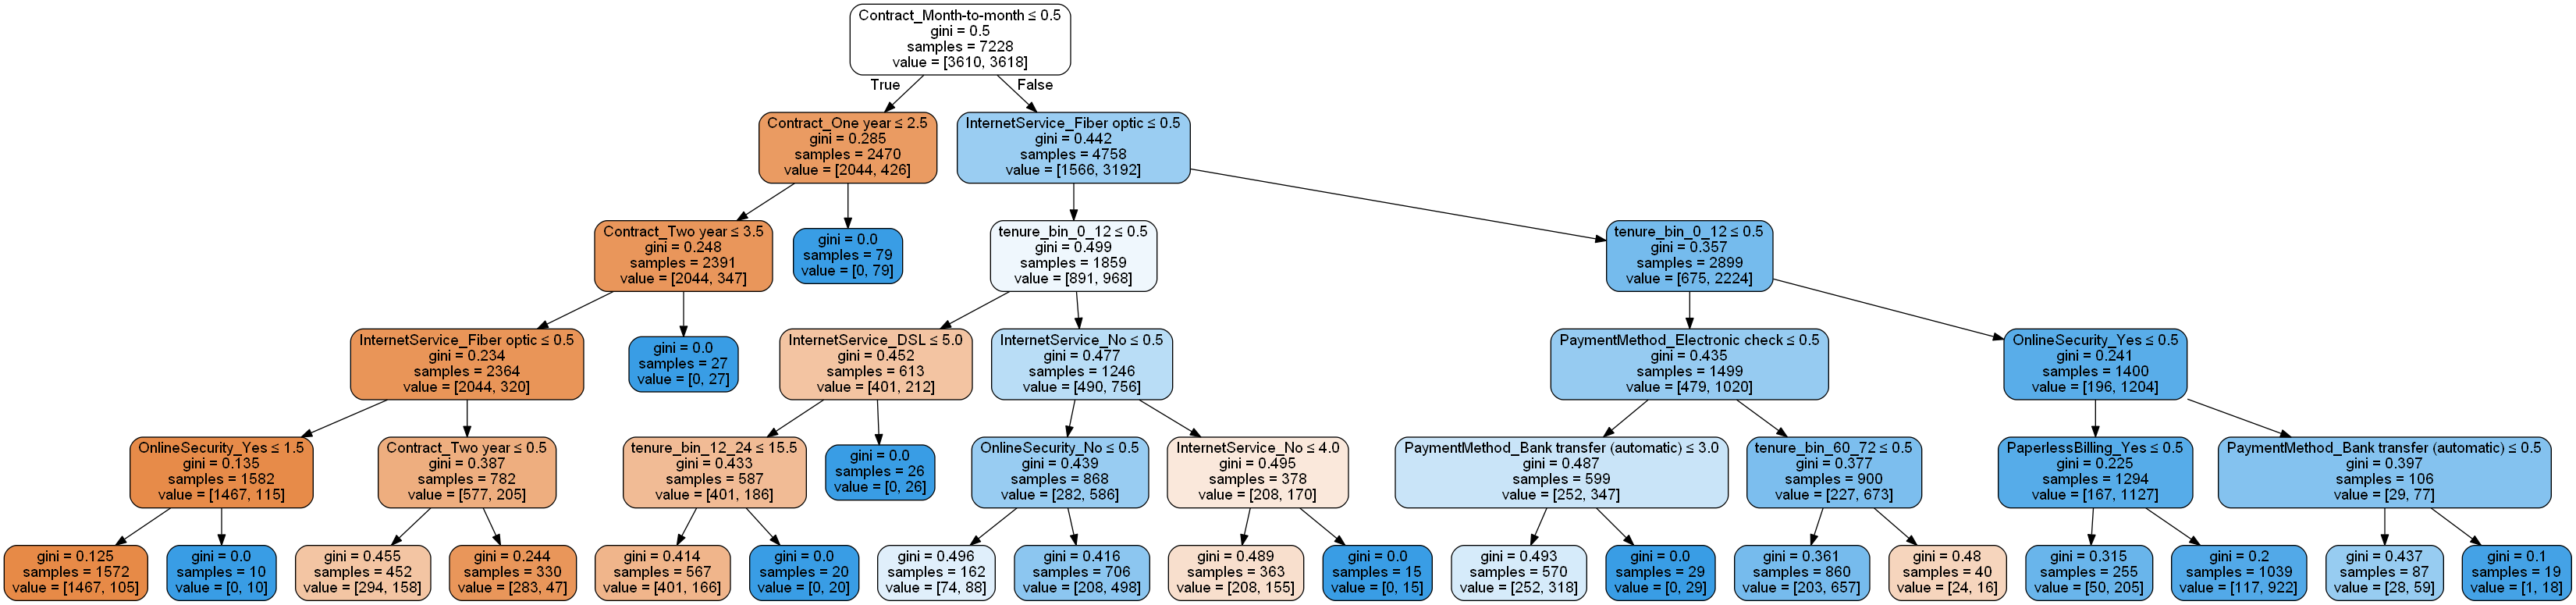

In [444]:
#Visualizing the decision tree

from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree
from sklearn import metrics
from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus

col_names = list(X_train.columns.values)
dot_data = StringIO()
tree.export_graphviz(dec_tree, out_file=dot_data,
                     feature_names=col_names,
                     filled=True,
                     rounded=True,
                     special_characters=True)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))

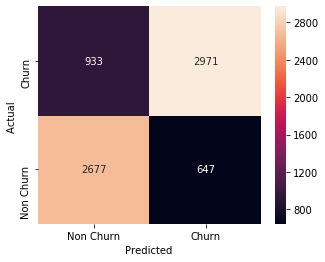

Classification Report is 

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      3324
           1       0.82      0.76      0.79      3904

    accuracy                           0.78      7228
   macro avg       0.78      0.78      0.78      7228
weighted avg       0.78      0.78      0.78      7228

Area under curve :  0.783 

##################################################
 Test data accuracy metrics are 


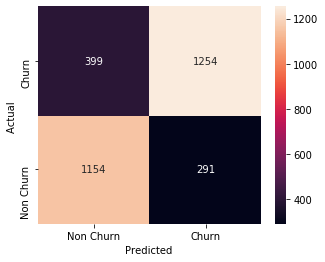

Classification Report is 

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1445
           1       0.81      0.76      0.78      1653

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098

Area under curve :  0.779 



In [445]:
#fitting decision tree on the train dataset
y_pred_train=dec_tree.predict(X_train)

#fitting logistic model on the test dataset
y_pred_test=dec_tree.predict(X_test)

#training dataset
accuracy_metrics(y_pred_train,y_train)

#testing dataset
print('##################################################')
print(' Test data accuracy metrics are ')
accuracy_metrics(y_pred_test,y_test)

## Bagging Models
        
       * Bagging Classifier
           - The number of trees won't overfit the model since it averages the predictions
           
       * Random Forest

In [450]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Instantiate decisiontree
decisiontree = DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=5)
number_of_trees=50

# Instantiate bagging classifier
bc = BaggingClassifier(base_estimator=decisiontree, 
                       n_estimators=number_of_trees, 
                       max_samples=0.7, # percentage of data for bootstrapping
                       random_state=1,
                       oob_score=True)

# Fit bagging classifier to the training set
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
      

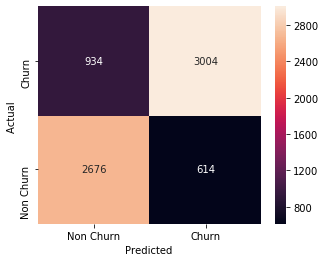

Classification Report is 

              precision    recall  f1-score   support

           0       0.74      0.81      0.78      3290
           1       0.83      0.76      0.80      3938

    accuracy                           0.79      7228
   macro avg       0.79      0.79      0.79      7228
weighted avg       0.79      0.79      0.79      7228

Area under curve :  0.788 

##################################################
 Test data accuracy metrics are 


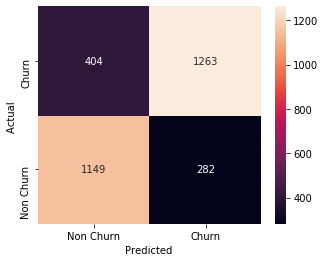

Classification Report is 

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1431
           1       0.82      0.76      0.79      1667

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098

Area under curve :  0.78 



In [451]:
#fitting decision tree on the train dataset
y_pred_train=bc.predict(X_train)

#fitting logistic model on the test dataset
y_pred_test=bc.predict(X_test)

#training dataset
accuracy_metrics(y_pred_train,y_train)

#testing dataset
print('##################################################')
print(' Test data accuracy metrics are ')
accuracy_metrics(y_pred_test,y_test)

## Random Forest

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
 
     * Evaluating multiple combinations of paramaters using Randomized SearchCV

In [465]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 3, 
                               verbose=2,
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train,y_train)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [468]:
print('The best hyper parameters for random forest are')
rf_random.best_params_

The best hyper parameters for random forest are


{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

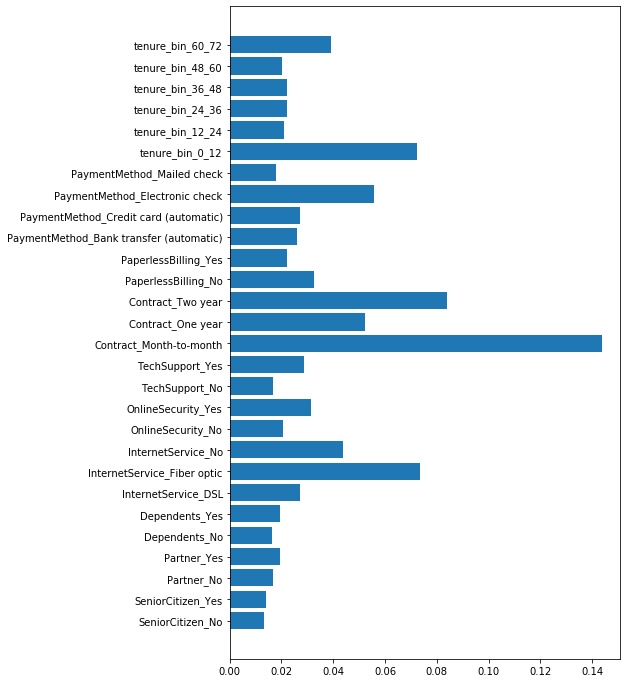

In [469]:

# random forest model creation
rfc = RandomForestClassifier(n_estimators=1800, 
                               bootstrap = True,
                               max_features = 'sqrt',max_depth=30,min_samples_split=10)

rfc.fit(X_train,y_train)

# Extract feature importances
feature_importance_random_Forest = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rfc.feature_importances_}).\
                    sort_values('importance', ascending = False)

plt.figure(figsize=(7,12))
plt.barh(list(X_train.columns), rfc.feature_importances_)
plt.show()

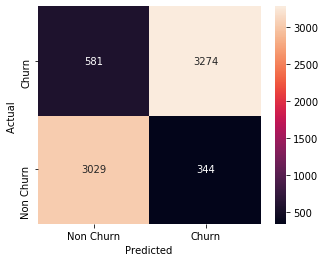

Classification Report is 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3373
           1       0.90      0.85      0.88      3855

    accuracy                           0.87      7228
   macro avg       0.87      0.87      0.87      7228
weighted avg       0.87      0.87      0.87      7228

Area under curve :  0.874 

##################################################
 Test data accuracy metrics are 


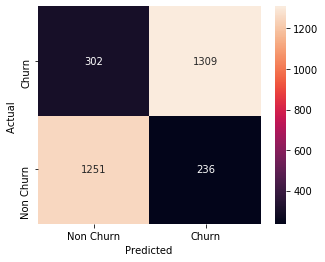

Classification Report is 

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1487
           1       0.85      0.81      0.83      1611

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098

Area under curve :  0.827 



In [470]:
#fitting decision tree on the train dataset
y_pred_train=rfc.predict(X_train)

#fitting logistic model on the test dataset
y_pred_test=rfc.predict(X_test)

#training dataset
accuracy_metrics(y_pred_train,y_train)

#testing dataset
print('##################################################')
print(' Test data accuracy metrics are ')
accuracy_metrics(y_pred_test,y_test)

## Gradient Boosting

    * AdaBoost 
    * Gradient Boosting

### AdaBoosting

In [493]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

lr_list = [0.05, 0.075,0.01,0.001, 0.1, 0.25, 0.5, 0.75, 1]
decision_tree=DecisionTreeClassifier()

hyperparameters_table=[]
#choosing hyper parameters (learning rate)
for learning_rate in lr_list:
    adaboost_clf = AdaBoostClassifier(
                                      learning_rate=learning_rate, 
                                      base_estimator=decision_tree, 
                                      random_state=0)
    adaboost_clf.fit(X_train, y_train)
    accuracy_training=round(adaboost_clf.score(X_train, y_train),2)
    accuracy_validation=round(adaboost_clf.score(X_test, y_test),2)
    hyperparameters_table.append([learning_rate,accuracy_training,accuracy_validation])


In [494]:
hyper_param_df=pd.DataFrame(hyperparameters_table).reset_index().rename(columns={0:'learning_rate',
                                                                  1:'training_accuracy',
                                                                 2:'validaton_accuracy'})

hyper_param_df

,index,learning_rate,training_accuracy,validaton_accuracy
0,0,0.050,0.89,0.80
1,1,0.075,0.89,0.81
2,2,0.010,0.89,0.81
3,3,0.001,0.89,0.82
4,4,0.100,0.89,0.81
5,5,0.250,0.89,0.82
6,6,0.500,0.89,0.82
7,7,0.750,0.89,0.82
8,8,1.000,0.89,0.82


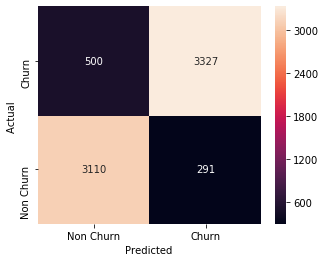

Classification Report is 

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      3401
           1       0.92      0.87      0.89      3827

    accuracy                           0.89      7228
   macro avg       0.89      0.89      0.89      7228
weighted avg       0.89      0.89      0.89      7228

Area under curve :  0.892 

##################################################
 Test data accuracy metrics are 


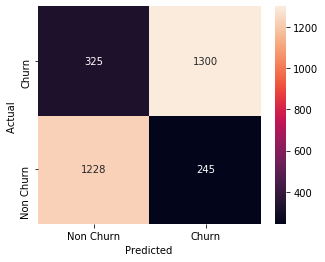

Classification Report is 

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1473
           1       0.84      0.80      0.82      1625

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098

Area under curve :  0.817 



In [482]:
adaboost_classfier_choosen=AdaBoostClassifier(
                                      learning_rate=0.001, 
                                      base_estimator=decision_tree, 
                                      random_state=0)

adaboost_classfier_choosen.fit(X_train,y_train)

#fitting decision tree on the train dataset
y_pred_train=adaboost_classfier_choosen.predict(X_train)

#fitting logistic model on the test dataset
y_pred_test=adaboost_classfier_choosen.predict(X_test)

#training dataset
accuracy_metrics(y_pred_train,y_train)

#testing dataset
print('##################################################')
print(' Test data accuracy metrics are ')
accuracy_metrics(y_pred_test,y_test)

### Gradient Boosting

In [497]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

lr_list = [0.05, 0.075,0.01,0.001,0.0001, 0.1, 0.25, 0.5, 0.75, 1]
hyperparameters_table=[]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    accuracy_training=round(gb_clf.score(X_train, y_train),2)
    accuracy_validation=round(gb_clf.score(X_test, y_test),2)
    hyperparameters_table.append([learning_rate,accuracy_training,accuracy_validation])

hyper_param_df=pd.DataFrame(hyperparameters_table).reset_index().rename(columns={0:'learning_rate',
                                                                  1:'training_accuracy',
                                                                 2:'validaton_accuracy'})

hyper_param_df

,index,learning_rate,training_accuracy,validaton_accuracy
0,0,0.0500,0.76,0.76
1,1,0.0750,0.77,0.76
2,2,0.0100,0.76,0.75
3,3,0.0010,0.75,0.75
4,4,0.0001,0.55,0.54
5,5,0.1000,0.77,0.77
6,6,0.2500,0.79,0.79
7,7,0.5000,0.80,0.80
8,8,0.7500,0.80,0.80
9,9,1.0000,0.81,0.81


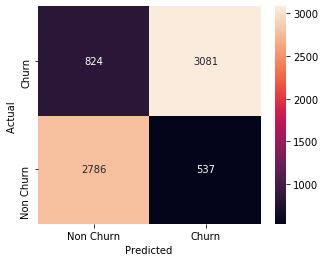

Classification Report is 

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      3323
           1       0.85      0.79      0.82      3905

    accuracy                           0.81      7228
   macro avg       0.81      0.81      0.81      7228
weighted avg       0.81      0.81      0.81      7228

Area under curve :  0.814 

##################################################
 Test data accuracy metrics are 


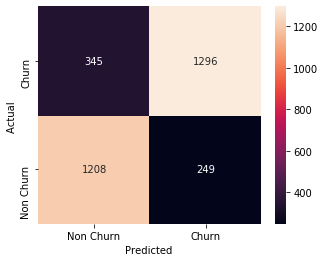

Classification Report is 

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1457
           1       0.84      0.79      0.81      1641

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098

Area under curve :  0.809 



In [499]:

#fitting decision tree on the train dataset
y_pred_train=gb_clf.predict(X_train)

#fitting logistic model on the test dataset
y_pred_test=gb_clf.predict(X_test)

#training dataset
accuracy_metrics(y_pred_train,y_train)

#testing dataset
print('##################################################')
print(' Test data accuracy metrics are ')
accuracy_metrics(y_pred_test,y_test)